In [1]:
"""
### Get global times of behcodes/events over entire recording session (for Emre)

"""

'\n### Get global times of behcodes/events over entire recording session (for Emre)\n\n'

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from neuralmonkey.classes.session import Session
import matplotlib.pyplot as plt
from neuralmonkey.scripts.load_and_save_locally import load_and_preprocess_single_session
import neuralmonkey.utils.monkeylogic as mkl
from neuralmonkey.classes.session import load_session_helper, load_mult_session_helper
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
# First, load set of dates, from Emre

import csv

path = "/lemur2/lucas/analyses/recordings/for_sharing/emre_k/event_times_global/date_channel_pairs.csv"

dates = []
with open(path, 'r') as f:
  csvFile = csv.reader(f)
  for lines in csvFile:
        if lines[0]=="date":
            continue
        dates.append(int(lines[0]))

dates = sorted(set(dates))
print("Get these dates: ", dates)

Get these dates:  [220901, 220902, 220907, 220908, 220915, 220918, 221015, 221024, 221031, 221217, 221218, 221220, 230103, 230104, 230105, 230112, 230117, 230118, 230119, 230120, 230122, 230124, 230125, 230126]


In [ ]:
# MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=False, BAREBONES_LOADING=True)   
dates = [
    # 221024, # Done
#  221031, # Done
#  221217, Done...
#  221218,
#  221220,
#  230103,
#  230104,
#  230105,
#  230112,
#  230117,
#  230118,
#  230119,
#  230120,
#  230122, Done...
#  230124, # IGnore, ws8 lost space
#  230125, #  Done
#  230126,
 ]


In [11]:
# Method 1: get event time within trial using good code. Then adjust to global time.
import pandas as pd
import pickle

SAVEDIR = "/lemur2/lucas/analyses/recordings/for_sharing/emre_k/event_times_global"
os.makedirs(SAVEDIR, exist_ok=True)

events_get = ["on", "fixcue", "fixtch", "samp", "go", "first_raise", "post", "off"]

# DATE = 220715
animal = "Pancho"

for DATE in dates:

    MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True)   

    res = []
    for i_sn, sn in enumerate(MS.SessionsList):   
        
        list_trials = sn.get_trials_list(True)

        # - Get time of trial onset, here:
        dat = np.zeros((len(list_trials), len(events_get))) - np.inf
        for i, trial in enumerate(list_trials):
            times_global = sn.events_get_times_as_array_global(trial, events_get)
            dat[i, :] = times_global
        assert np.all(dat > -np.inf)
        df = pd.DataFrame(dat, index=list_trials, columns=events_get)

        # Also extract the global time this session started -- to align to ks
        onsets_using_rs4_each_rs = sn.spiketimes_ks_compute_timeglobal_thissession_start()

        res.append({
            "idx_session":i_sn,
            "event_times_each_trial":df,
            "this_session_onset_within_day":np.mean(list(onsets_using_rs4_each_rs.values()))
        })

        # Save 
        path = f"{SAVEDIR}/{animal}-{DATE}-sess={i_sn}.pkl"
        with open(path, "wb") as f:
            pickle.dump(res, f)


Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Pancho*/*221024*/**
Found this many paths:
2
---
/home/lucas/mnt/Freiwald/ltian/recordings/Pancho/221024/Pancho-221024-152427
---
/home/lucas/mnt/Freiwald/ltian/recordings/Pancho/221024/Pancho-221024-182244
session:  0
Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Pancho*/*221024*/**
Found this many paths:
2
---
/home/lucas/mnt/Freiwald/ltian/recordings/Pancho/221024/Pancho-221024-152427
---
/home/lucas/mnt/Freiwald/ltian/recordings/Pancho/221024/Pancho-221024-182244
Beh Sessions hand netered (mapping: rec sess --> beh sess):  [1, 1]
Beh Sessions that exist on this date:  {221024: [(1, 'dirshapecolor1c'), (1, 'dirshapecolor1c')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['dirshapecolor1c']
Loading these beh sessions: [1]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Pancho*/*2210

#### Debuggin

In [ ]:
# Method 2: Get global event time directly.
# see code: _behcode_extract_times
# Just sanity check, confirmed that this matches the above method.
sn._behcode_extract_times(9, 398)
samps = sn._behcode_extract_times(9)

plt.figure()
plt.plot(samps, "ok")
plt.plot(df["samp"].values, "xr")


# [For Emre] Printing contents

In [20]:
import pickle
path = "/lemur2/lucas/analyses/recordings/for_sharing/emre_k/event_times_global/Pancho-221024-sess=0.pkl"
with open(path, "rb") as f:
    res = pickle.load(f)

In [ ]:
# The session index. A given day might have multipel sessions.
# Kilosorted times are after concatenating sessions
res[0]["idx_session"]

0

In [ ]:
# The start of this session is at this time in the kilosort data (which concatenates all sessinos)
res[0]["this_session_onset_within_day"]

0.0

In [ ]:
# This holds times for each event, where rows are trials.
# Times are in second, relative to the onset of this session
res[0]["event_times_each_trial"]

,on,fixcue,fixtch,samp,go,first_raise,post,off
2,48.055715,49.041662,49.673443,50.842592,52.234067,52.575443,56.615985,58.240665
3,61.912501,62.899308,63.446498,64.651086,65.990460,66.332498,68.055353,69.979573
4,72.970227,74.152700,74.770674,75.754072,77.262530,77.604674,79.277287,85.537042
5,89.760205,90.930308,91.477604,92.698796,94.088306,94.345604,98.486936,101.645896
6,105.616599,106.636460,107.151876,108.170986,109.662731,109.901876,112.395108,118.321040
...,...,...,...,...,...,...,...,...
649,10202.930431,10203.918837,10204.365708,10205.367838,10206.709179,10207.015708,10210.954455,10211.416319
650,10216.987462,10218.109029,10218.438730,10219.641589,10221.016353,10221.256730,10225.096478,10226.857430
651,10242.483741,10243.538298,10244.085019,10245.138687,10246.428909,10246.753019,10250.445136,10253.770966
652,10259.642296,10260.713973,10261.177573,10262.229821,10263.704855,10263.895573,10267.403560,10269.045319


The most relevant time windows, which can be compared across dates
- off (trial n) to on (trial n+1): The inter-trial interval. This must be done only for contiguous trials (n to n+1).
- fixtch to samp: holding fixation button, waiting for image to turn on.
- samp to go: The "planning" period, where the image is on, but no hand movement yet.
- go to first_raise. between the go cue and when monkey raises finger off "fixation" to start drawing.
- first_raise to post, during drawing. This may not be as consistent across days, beucase of variation in the drwaing task.




Text(0, 0.5, 'actual trial label')

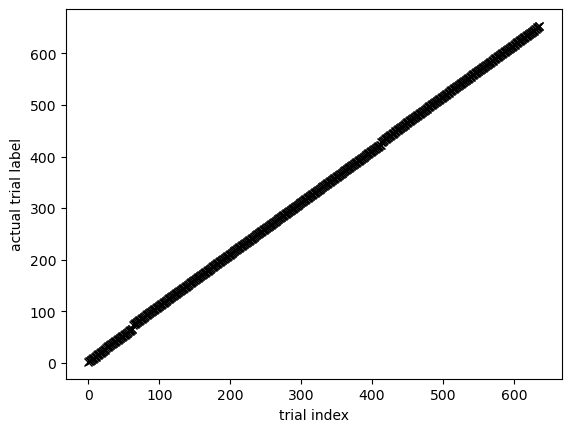

In [ ]:
# This shows the trial labels.
trials = res[0]["event_times_each_trial"].index
fig, ax = plt.subplots()
ax.plot(trials, "xk")
ax.set_xlabel("trial index")
ax.set_ylabel("actual trial label")
